In [5]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import seaborn as sns


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


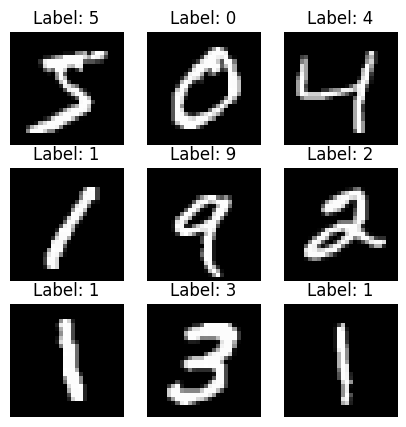

In [6]:
# Trực quan hóa dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Hiển thị ảnh mẫu
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Chuẩn hóa & reshape
x_train = x_train / 255.0
x_test  = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [7]:
# Xây dựng mô hình CNN

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\baoph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 - 12s - 14ms/step - accuracy: 0.9209 - loss: 0.2560 - val_accuracy: 0.9838 - val_loss: 0.0546
Epoch 2/10
844/844 - 9s - 11ms/step - accuracy: 0.9749 - loss: 0.0875 - val_accuracy: 0.9875 - val_loss: 0.0400
Epoch 3/10
844/844 - 9s - 11ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 4/10
844/844 - 10s - 12ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 5/10
844/844 - 8s - 10ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 6/10
844/844 - 8s - 10ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9923 - val_loss: 0.0288
Epoch 7/10
844/844 - 8s - 10ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9925 - val_loss: 0.0311
Epoch 8/10
844/844 - 8s - 10ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.9923 - val_loss: 0.0325
Epoch 9/10
844/844 - 8s - 10ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9923 - val_los

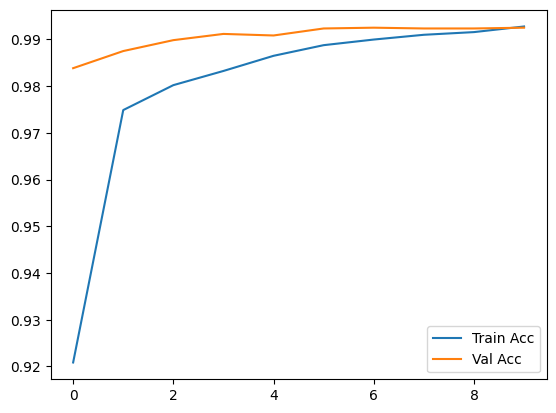

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


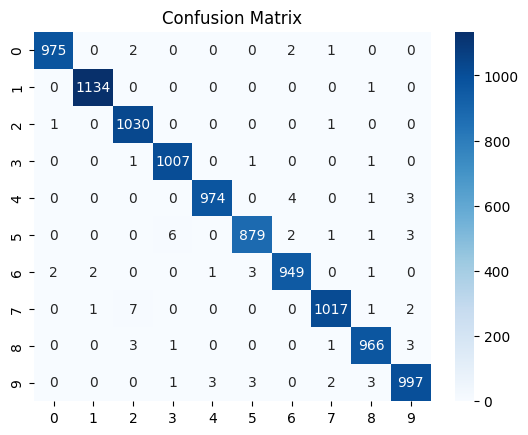

In [8]:
# Train model và đánh giá
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# Đánh giá test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

# Vẽ Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
